# Examples

In [1]:
import numpy as np
from scipy.stats import betabinom, beta as beta_dist

Let's create example count data with following shape

In [2]:
size = (2000, 500)

Ground truth `alpha` and `beta` parameters to sample count data

In [3]:
alpha_true = np.random.random((size[0], 1)) * 10
beta_true = 10 - alpha_true

Sampling counts (`k`) and total counts (`n`) with ground truth 

In [4]:
n = (np.random.random(size) * 2000).astype('int')
k = betabinom.rvs(n, alpha_true * np.ones(size),  beta_true * np.ones(size))

In [5]:
n, k

(array([[ 643,  402,  736, ..., 1730, 1362,  236],
        [1261, 1908, 1173, ...,  859,  909,  475],
        [ 966, 1060, 1435, ...,   10,  582, 1693],
        ...,
        [ 978, 1388,  261, ...,    9, 1045,  214],
        [ 715, 1987, 1379, ..., 1367,   59, 1000],
        [ 946,  287, 1368, ...,  492,  451, 1277]]),
 array([[ 249,  197,  276, ..., 1553,  503,  118],
        [ 196,  527,  130, ...,    9,  103,  179],
        [ 539,  472,  816, ...,    6,  347,  735],
        ...,
        [ 306,  964,  128, ...,    5,  601,  150],
        [ 655, 1922, 1171, ..., 1293,   45,  810],
        [ 583,  178,  248, ...,   64,  195,  382]]))

In [6]:
from betabinomial import BetaBinomial

In [7]:
bb = BetaBinomial()

Inference of `alpha` and `beta` parameters from count data

In [8]:
bb.infer(k, n)

 42%|████▏     | 423/1000 [00:30<00:41, 13.79it/s]


BetaBinomial[2000]

Infered `alpha` and `beta`

In [9]:
bb.alpha, bb.beta

(array([[5.90111233],
        [1.17191851],
        [6.27580867],
        ...,
        [6.87969866],
        [8.99132085],
        [3.20719648]]),
 array([[4.92094763],
        [8.41647732],
        [3.85951562],
        ...,
        [3.69910629],
        [0.87364963],
        [7.37440814]]))

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 150

Plot true beta distribution mean `(alpha / (alpha + beta))` against inferred

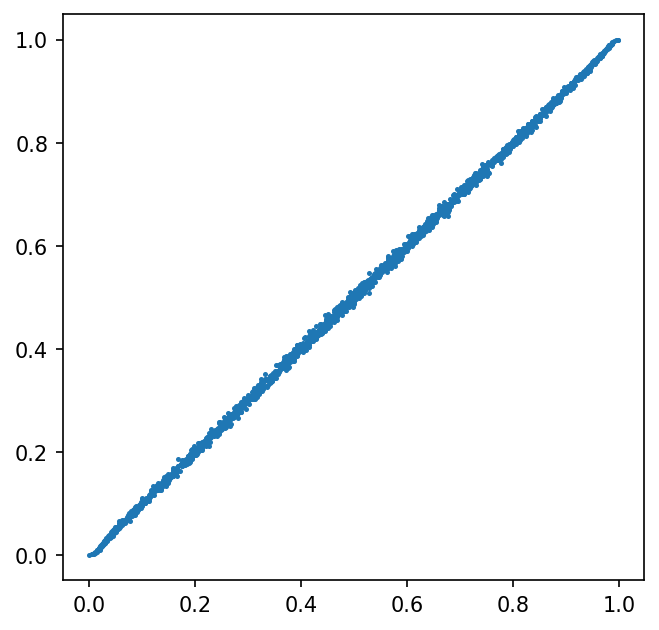

In [11]:
true_beta_mean = alpha_true / (alpha_true + beta_true)
plt.scatter(bb.beta_mean(), true_beta_mean, s=2)

Plot true and predicted `alpha` and `beta` values

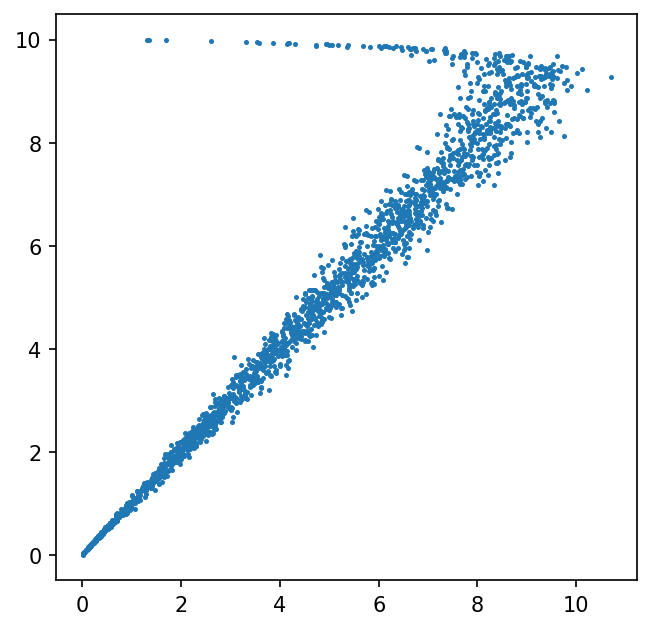

In [12]:
plt.scatter(bb.alpha, alpha_true, s=2)

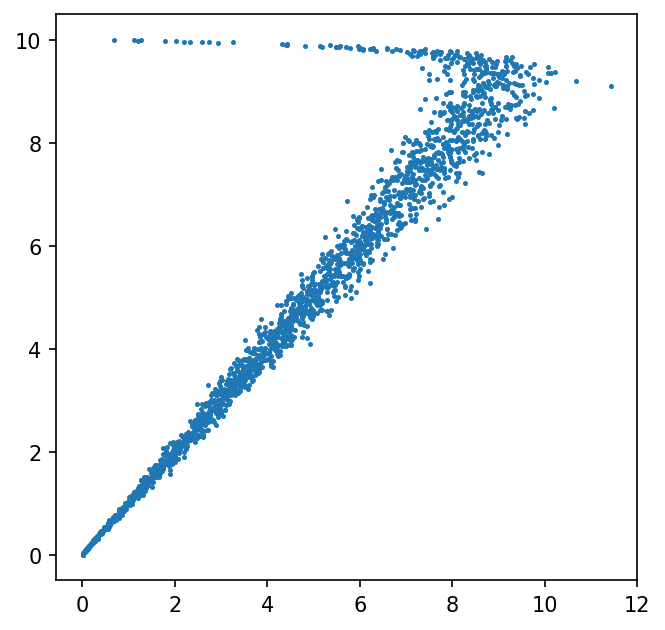

In [13]:
plt.scatter(bb.beta, beta_true, s=2)

Plot a example distribution and true and predicted beta distribution

/home/cs/anaconda3/envs/betabinomial/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


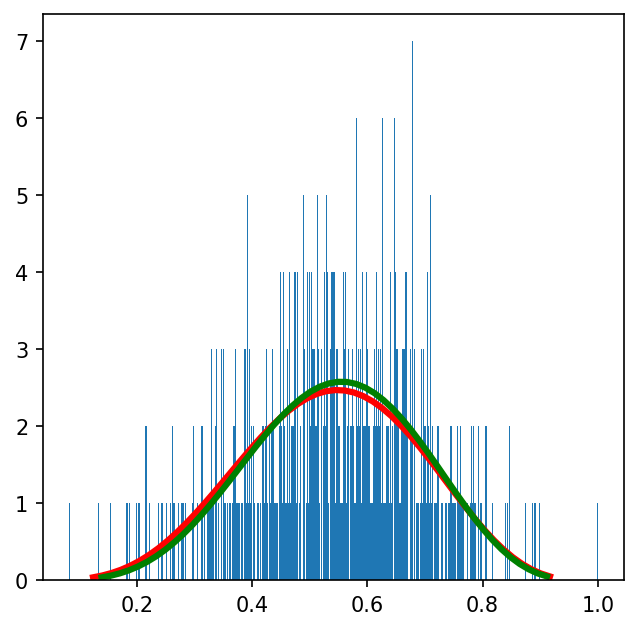

In [14]:
row = np.argwhere((true_beta_mean < 0.8) & (true_beta_mean > 0.2))[0][0]

x = np.linspace(
    beta_dist.ppf(0.001, alpha_true[row], beta_true[row]), 
    beta_dist.ppf(0.999, alpha_true[row], beta_true[row])
)
plt.plot(x, beta_dist.pdf(x, alpha_true[row], beta_true[row]), color='red', linewidth=3)

x = np.linspace(
    beta_dist.ppf(0.001, bb.alpha[row], bb.beta[row]), 
    beta_dist.ppf(0.999, bb.alpha[row], bb.beta[row])
)
plt.hist((k / n)[row, :], bins=500)
plt.plot(x, beta_dist.pdf(x, bb.alpha[row], bb.beta[row]), color='green', linewidth=3)

Plot an example count data and predicted and true beta mean. 

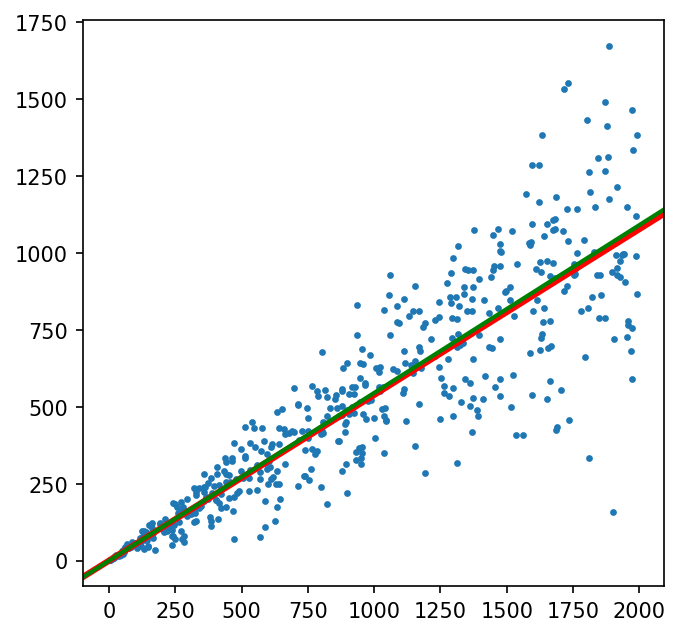

In [15]:
plt.scatter(n[row, :], k[row, :], s=5)
plt.axline((0, 0), slope=alpha_true[row] / (alpha_true[row] + beta_true[row]), color='red', linewidth=3)
plt.axline((0, 0), slope=bb.beta_mean()[row], color='green', linewidth=2)

Perform beta binomial test and return p-values

In [16]:
%%time
pval = bb.pval(k, n, alternative='two-sided') # 'less', 'greater'

CPU times: user 1min 13s, sys: 132 ms, total: 1min 13s
Wall time: 1min 13s


In [17]:
pval

array([[0.3024323 , 0.71783721, 0.26493792, ..., 0.0040517 , 0.24639214,
        0.77164253],
       [0.5916317 , 0.17327847, 0.88024622, ..., 0.117335  , 0.86065672,
        0.05210928],
       [0.66576406, 0.25957367, 0.71324979, ..., 0.93432651, 0.84825939,
        0.23008366],
       ...,
       [0.02469224, 0.81291417, 0.29115387, ..., 0.80582631, 0.58397361,
        0.77351307],
       [0.79828567, 0.63339124, 0.38594751, ..., 0.9104928 , 0.17621192,
        0.24878696],
       [0.03657361, 0.0358853 , 0.40090043, ..., 0.18886599, 0.35276397,
        0.94860864]])

Multiple testing correction for p-values

In [18]:
from betabinomial import pval_adj

padj = pval_adj(pval)

In [19]:
padj

array([[0.98238656, 0.99985032, 0.97738457, ..., 0.14635016, 0.97299313,
        0.99988192],
       [0.9991514 , 0.94910965, 0.99988192, ..., 0.90040026, 0.99988192,
        0.75038205],
       [0.99983112, 0.97607204, 0.99985032, ..., 0.99988192, 0.99988192,
        0.96874961],
       ...,
       [0.54627678, 0.99988192, 0.98155834, ..., 0.99988192, 0.99883718,
        0.99988192],
       [0.99988192, 0.99968944, 0.99022587, ..., 0.99988192, 0.95044065,
        0.97365185],
       [0.65882102, 0.65395819, 0.9915473 , ..., 0.95580413, 0.98791013,
        0.99988192]])

log-fold change based on the beta-binomial expectation and measured values: 

$$\mu = \frac{n * \alpha}{\alpha + \beta}$$

$$logFC = \log(\frac{k}{\mu})$$

In [20]:
logfc = bb.logFC(k, n)

/home/cs/Projects/betabinomial/betabinomial/betabinomial.py:128: RuntimeWarning: invalid value encountered in true_divide
  return k / self.mean(n)
/home/cs/Projects/betabinomial/betabinomial/betabinomial.py:131: RuntimeWarning: divide by zero encountered in log
  return np.log(self.FC(k, n))


In [21]:
logfc

array([[-0.34224605, -0.10680258, -0.37438348, ...,  0.49851291,
        -0.38967354, -0.0867014 ],
       [ 0.24036577,  0.81530114, -0.09787395, ..., -2.4566329 ,
        -0.07570466,  1.12598245],
       [-0.10412384, -0.32972077, -0.08518135, ..., -0.0315012 ,
        -0.03782124, -0.35506246],
       ...,
       [-0.73164695,  0.06574977, -0.28221253, ..., -0.15750905,
        -0.12289961,  0.07493689],
       [ 0.00508308,  0.05947073, -0.07077013, ...,  0.03707693,
        -0.17814457, -0.11799065],
       [ 0.70966451,  0.71602123, -0.51395646, ..., -0.84587574,
         0.35525211, -0.01312835]])

z-score based on the beta-binomial mean and variance and measured values:

$$\mu = \frac{n * \alpha}{\alpha + \beta}$$

$$\rho = \frac{1}{1 + \alpha + \beta}$$

$$\sigma^2 = n * \mu * (1 - \mu) * (1 + (n - 1) * \rho)$$

$$ z_{score} = \frac{k - \mu}{\sigma}$$

In [22]:
zscore = bb.z_score(k, n)

/home/cs/Projects/betabinomial/betabinomial/betabinomial.py:155: RuntimeWarning: invalid value encountered in true_divide
  return (k - self.mean(n)) / np.sqrt(self.variance(n))


In [23]:
zscore

array([[-1.08218878, -0.37637173, -1.16727504, ...,  2.42577144,
        -1.21031726, -0.3057654 ],
       [ 0.32867455,  1.52591747, -0.11275043, ..., -1.103992  ,
        -0.08806581,  2.5043738 ],
       [-0.41859068, -1.18950786, -0.3462346 , ..., -0.09299191,
        -0.15657404, -1.26796308],
       ...,
       [-2.39498205,  0.3141733 , -1.11860139, ..., -0.45850918,
        -0.53397077,  0.35250097],
       [ 0.0535196 ,  0.64634314, -0.71991724, ...,  0.39799326,
        -1.59715588, -1.17112662],
       [ 2.30620724,  2.30604331, -0.89846667, ..., -1.26753798,
         0.94625376, -0.02915105]])

Plot volcona plot with `np.log10(padj)` and `zscore`

/home/cs/anaconda3/envs/betabinomial/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '$\\log_{10}(p_{adj})$')

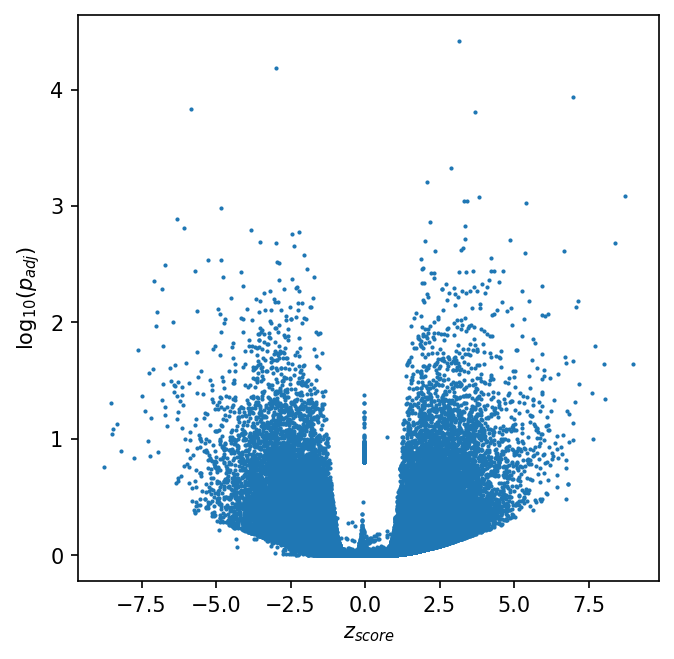

In [30]:
plt.scatter(zscore.ravel(), -np.log10(padj.ravel()), s=1)
plt.xlabel('$z_{score}$')
plt.ylabel('$\log_{10}(p_{adj})$')

Plot volcona plot with `np.log10(padj)` and `logFC`

/home/cs/anaconda3/envs/betabinomial/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '$\\log_{10}(p_{adj})$')

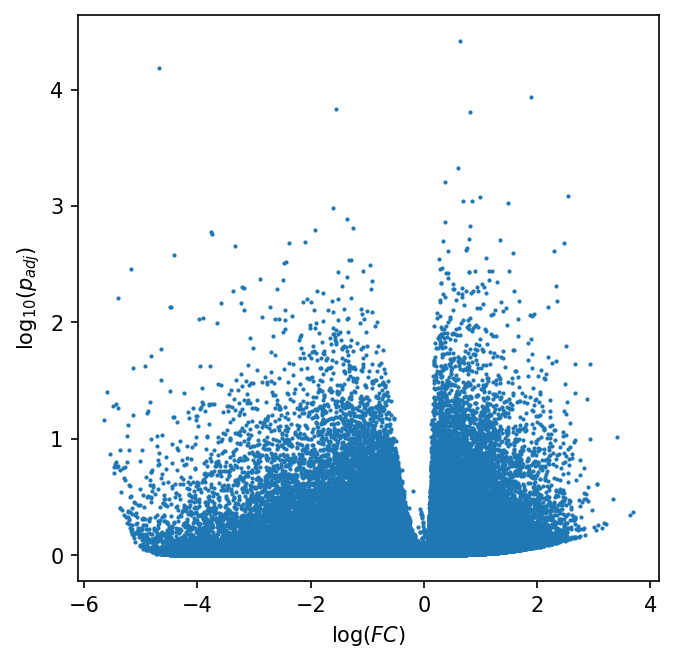

In [29]:
plt.scatter(logfc.ravel(), -np.log10(padj.ravel()), s=1)
plt.xlabel('$\log(FC)$')
plt.ylabel('$\log_{10}(p_{adj})$')